# Import Libraries

In [2]:
# for data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# for machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# for visualization
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


# for GUI
import ipywidgets as widgets

# Data Preparation

In [3]:
# read dataset
df = pd.read_csv("../data/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# replace 'Yes' and 'No' with 1 and 0 respectively
cols = ["Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", \
        "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity", "class"]
yn_cols = cols[2:16]

for i in yn_cols:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

# replace 'Male' and 'Female' with 1 and o respectively
df["Gender"] = df["Gender"].map({'Male': 1, 'Female': 0})

# replace 'Positive' and 'Negative' with 1 and 0 respectively
df["class"] = df["class"].map({'Positive': 1, 'Negative': 0})

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
# split dataset into train and test set
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# check class imbalance
print(df.groupby(df["class"]).size())

class
0    200
1    320
dtype: int64


In [7]:
# normalization and balancing the class
def scale_dataset(X, y, oversample=False):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [8]:
# scale dataset on train and test
train, X_train, y_train = scale_dataset(X_train, y_train, oversample=True)
test, X_test, y_test = scale_dataset(X_test, y_test, oversample=False)

In [9]:
# check the balanced class
print('The number of positive in the train set: ', sum(y_train==1))
print('The number of negative in the train set: ', sum(y_train==0))

The number of positive in the train set:  226
The number of negative in the train set:  226


# Model Analysis

In [10]:
# for the k-nearest neighbors and the decision tree algorithms
models = [KNeighborsClassifier(), DecisionTreeClassifier()]

for i in range(2):
    models[i].fit(X_train, y_train)

    print(f'{models[i]}: ')

    y_pred = models[i].predict(X_test)
    
    print(classification_report(y_test, y_pred))

KNeighborsClassifier(): 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        62
           1       1.00      0.89      0.94        94

    accuracy                           0.94       156
   macro avg       0.93      0.95      0.93       156
weighted avg       0.94      0.94      0.94       156

DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.95      0.96      0.95        94

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



In [11]:
# for the logistic regression and the support vector machine algorithms
models = [LogisticRegression(), SVC()]

for i in range(2):
    models[i].fit(X_train, y_train)

    print(f'{models[i]}: ')

    y_pred = models[i].predict(X_test)

    print(classification_report(y_test, y_pred))

LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        62
           1       0.94      0.88      0.91        94

    accuracy                           0.90       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.90      0.90      0.90       156

SVC(): 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        62
           1       0.97      0.97      0.97        94

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



In [12]:
# Based on the machine learning analysis above, the SVM had the highest accuracy, precision, and recall.
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        62
           1       0.97      0.97      0.97        94

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



# Visualizations

In [13]:
# mean and median of 'Age'
mean_age = df["Age"].mean()
median_age = df["Age"].median()
print('The mean of the Age dataset: ', mean_age)
print('The median of the Age dataset: ', median_age)


age45down_pos = len(df.loc[(df['Age'] >= 35) & (df['Age'] <= 60)])
print(age45down_pos)

The mean of the Age dataset:  48.02884615384615
The median of the Age dataset:  47.5
377


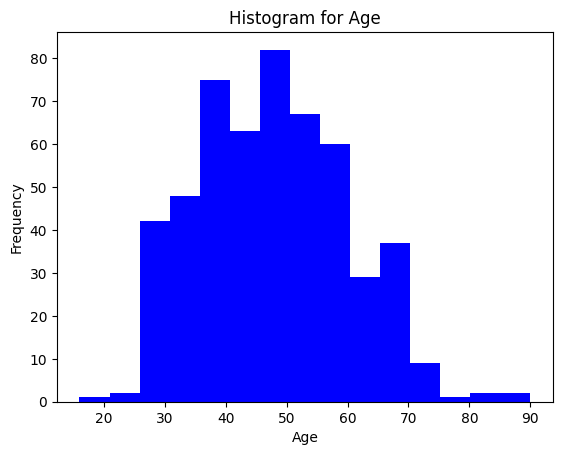

In [14]:
# Histogram for Age
df["Age"].hist(bins=15, grid=False, color='blue')

plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

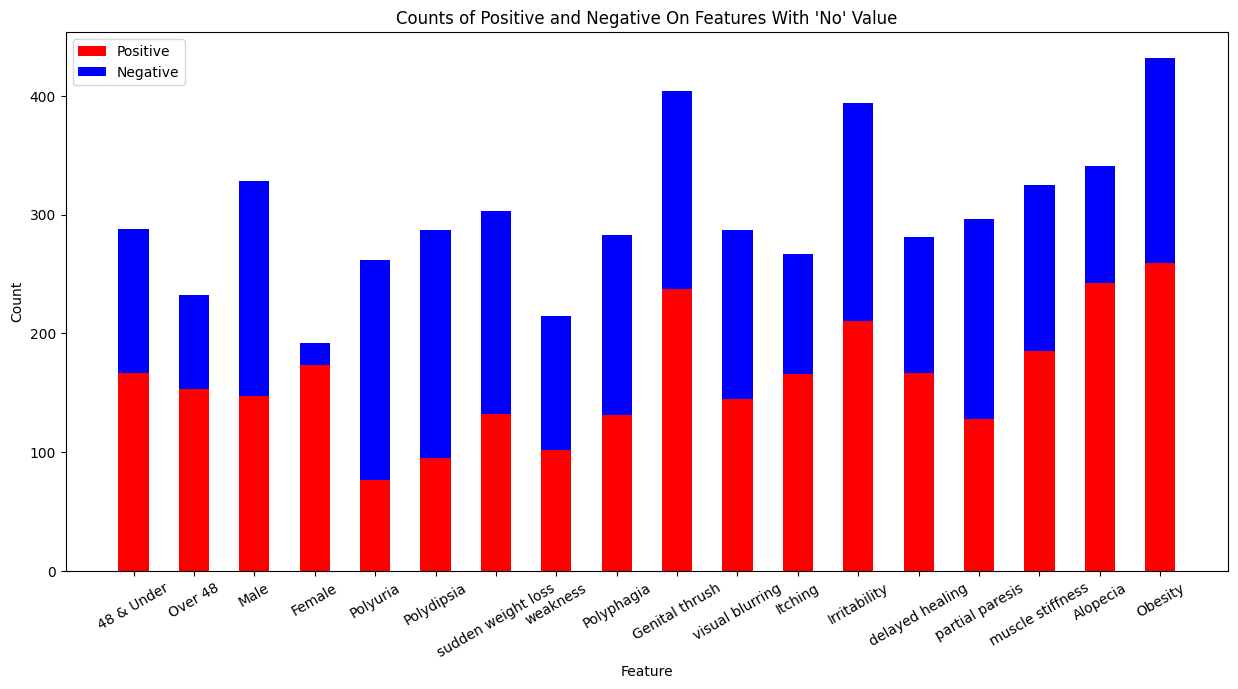

In [15]:
# BAR CHART for counts of positive and negative on features with 'No' values
features = ["48 & Under", "Over 48", "Male", "Female", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", 
            "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]

# get counts on age, male, female, features with answering 'Yes'
age48down_pos = len(df.loc[(df['Age'] <= 48) & (df['class'] == 1)])
age48down_neg = len(df.loc[(df['Age'] <= 48) & (df['class'] == 0)])
age48up_pos = len(df.loc[(df['Age'] > 48) & (df['class'] == 1)])
age48up_neg = len(df.loc[(df['Age'] > 48) & (df['class'] == 0)])
mal_pos = len(df.loc[(df['Gender'] == 1) & (df['class'] == 1)])
mal_neg = len(df.loc[(df['Gender'] == 1) & (df['class'] == 0)])
fem_pos = len(df.loc[(df['Gender'] == 0) & (df['class'] == 1)])
fem_neg = len(df.loc[(df['Gender'] == 0) & (df['class'] == 0)])
uri_pos = len(df.loc[(df['Polyuria'] == 0) & (df['class'] == 1)])
uri_neg = len(df.loc[(df['Polyuria'] == 0) & (df['class'] == 0)])
dip_pos = len(df.loc[(df['Polydipsia'] == 0) & (df['class'] == 1)])
dip_neg = len(df.loc[(df['Polydipsia'] == 0) & (df['class'] == 0)])
swl_pos = len(df.loc[(df['sudden weight loss'] == 0) & (df['class'] == 1)])
swl_neg = len(df.loc[(df['sudden weight loss'] == 0) & (df['class'] == 0)])
wea_pos = len(df.loc[(df['weakness'] == 0) & (df['class'] == 1)])
wea_neg = len(df.loc[(df['weakness'] == 0) & (df['class'] == 0)])
pha_pos = len(df.loc[(df['Polyphagia'] == 0) & (df['class'] == 1)])
pha_neg = len(df.loc[(df['Polyphagia'] == 0) & (df['class'] == 0)])
gt_pos = len(df.loc[(df['Genital thrush'] == 0) & (df['class'] == 1)])
gt_neg = len(df.loc[(df['Genital thrush'] == 0) & (df['class'] == 0)])
vb_pos = len(df.loc[(df['visual blurring'] == 0) & (df['class'] == 1)])
vb_neg = len(df.loc[(df['visual blurring'] == 0) & (df['class'] == 0)])
itc_pos = len(df.loc[(df['Itching'] == 0) & (df['class'] == 1)])
itc_neg = len(df.loc[(df['Itching'] == 0) & (df['class'] == 0)])
irr_pos = len(df.loc[(df['Irritability'] == 0) & (df['class'] == 1)])
irr_neg = len(df.loc[(df['Irritability'] == 0) & (df['class'] == 0)])
dh_pos = len(df.loc[(df['delayed healing'] == 0) & (df['class'] == 1)])
dh_neg = len(df.loc[(df['delayed healing'] == 0) & (df['class'] == 0)])
pp_pos = len(df.loc[(df['partial paresis'] == 0) & (df['class'] == 1)])
pp_neg = len(df.loc[(df['partial paresis'] == 0) & (df['class'] == 0)])
ms_pos = len(df.loc[(df['muscle stiffness'] == 0) & (df['class'] == 1)])
ms_neg = len(df.loc[(df['muscle stiffness'] == 0) & (df['class'] == 0)])
alp_pos = len(df.loc[(df['Alopecia'] == 0) & (df['class'] == 1)])
alp_neg = len(df.loc[(df['Alopecia'] == 0) & (df['class'] == 0)])
obe_pos = len(df.loc[(df['Obesity'] == 0) & (df['class'] == 1)])
obe_neg = len(df.loc[(df['Obesity'] == 0) & (df['class'] == 0)])

y_pos = [age48down_pos, age48up_pos, mal_pos, fem_pos, uri_pos, dip_pos, swl_pos, wea_pos, pha_pos, gt_pos, vb_pos, itc_pos, irr_pos, dh_pos, pp_pos, ms_pos, alp_pos, obe_pos]
y_neg = [age48down_neg, age48up_neg, mal_neg, fem_neg, uri_neg, dip_neg, swl_neg, wea_neg, pha_neg, gt_neg, vb_neg, itc_neg, irr_neg, dh_neg, pp_neg, ms_neg, alp_neg, obe_neg]

width = 0.5
plt.figure(figsize=(15, 7))
plt.bar(features, y_pos, width, color='r')
plt.bar(features, y_neg, width, bottom=y_pos, color='b')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Counts of Positive and Negative On Features With \'No\' Value')
plt.legend(['Positive', 'Negative'])
plt.xticks(rotation=30) # for xlabel not overlapping each other
plt.show()

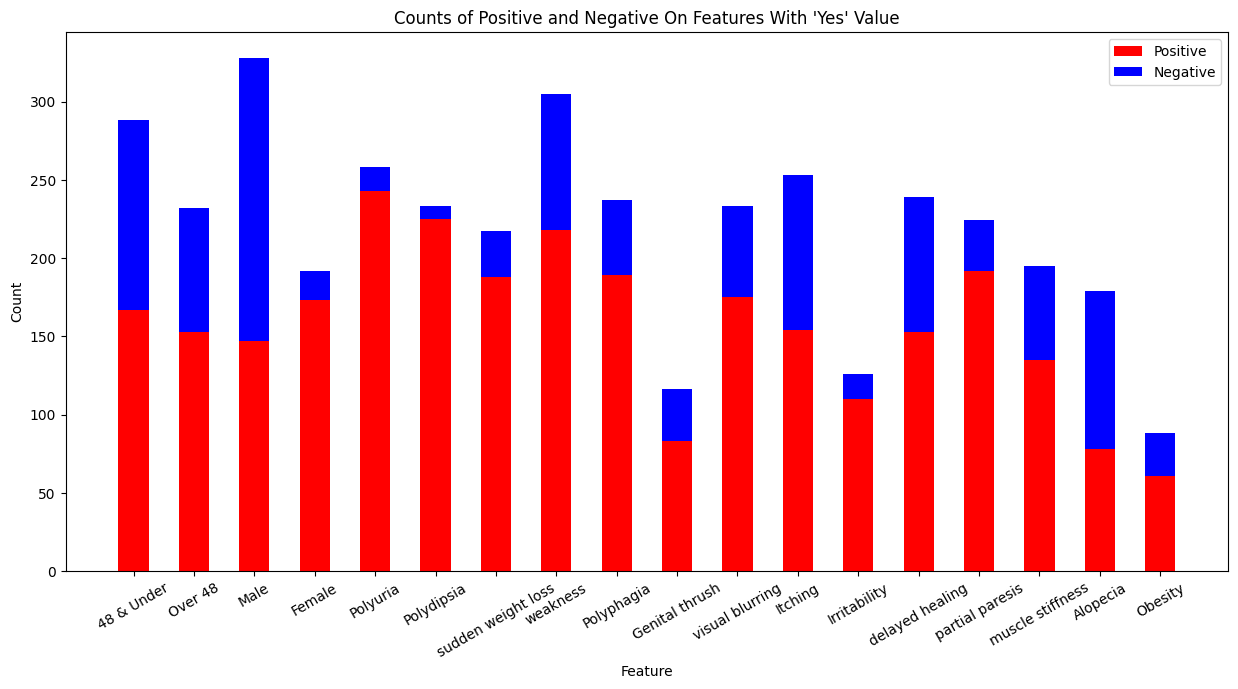

In [16]:
# BAR CHART for counts of positive and negative on features with 'Yes' values
features = ["48 & Under", "Over 48", "Male", "Female", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", 
            "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]

# get counts on age, male, female, features with answering 'Yes'
age48down_pos = len(df.loc[(df['Age'] <= 48) & (df['class'] == 1)])
age48down_neg = len(df.loc[(df['Age'] <= 48) & (df['class'] == 0)])
age48up_pos = len(df.loc[(df['Age'] > 48) & (df['class'] == 1)])
age48up_neg = len(df.loc[(df['Age'] > 48) & (df['class'] == 0)])
mal_pos = len(df.loc[(df['Gender'] == 1) & (df['class'] == 1)])
mal_neg = len(df.loc[(df['Gender'] == 1) & (df['class'] == 0)])
fem_pos = len(df.loc[(df['Gender'] == 0) & (df['class'] == 1)])
fem_neg = len(df.loc[(df['Gender'] == 0) & (df['class'] == 0)])
uri_pos = len(df.loc[(df['Polyuria'] == 1) & (df['class'] == 1)])
uri_neg = len(df.loc[(df['Polyuria'] == 1) & (df['class'] == 0)])
dip_pos = len(df.loc[(df['Polydipsia'] == 1) & (df['class'] == 1)])
dip_neg = len(df.loc[(df['Polydipsia'] == 1) & (df['class'] == 0)])
swl_pos = len(df.loc[(df['sudden weight loss'] == 1) & (df['class'] == 1)])
swl_neg = len(df.loc[(df['sudden weight loss'] == 1) & (df['class'] == 0)])
wea_pos = len(df.loc[(df['weakness'] == 1) & (df['class'] == 1)])
wea_neg = len(df.loc[(df['weakness'] == 1) & (df['class'] == 0)])
pha_pos = len(df.loc[(df['Polyphagia'] == 1) & (df['class'] == 1)])
pha_neg = len(df.loc[(df['Polyphagia'] == 1) & (df['class'] == 0)])
gt_pos = len(df.loc[(df['Genital thrush'] == 1) & (df['class'] == 1)])
gt_neg = len(df.loc[(df['Genital thrush'] == 1) & (df['class'] == 0)])
vb_pos = len(df.loc[(df['visual blurring'] == 1) & (df['class'] == 1)])
vb_neg = len(df.loc[(df['visual blurring'] == 1) & (df['class'] == 0)])
itc_pos = len(df.loc[(df['Itching'] == 1) & (df['class'] == 1)])
itc_neg = len(df.loc[(df['Itching'] == 1) & (df['class'] == 0)])
irr_pos = len(df.loc[(df['Irritability'] == 1) & (df['class'] == 1)])
irr_neg = len(df.loc[(df['Irritability'] == 1) & (df['class'] == 0)])
dh_pos = len(df.loc[(df['delayed healing'] == 1) & (df['class'] == 1)])
dh_neg = len(df.loc[(df['delayed healing'] == 1) & (df['class'] == 0)])
pp_pos = len(df.loc[(df['partial paresis'] == 1) & (df['class'] == 1)])
pp_neg = len(df.loc[(df['partial paresis'] == 1) & (df['class'] == 0)])
ms_pos = len(df.loc[(df['muscle stiffness'] == 1) & (df['class'] == 1)])
ms_neg = len(df.loc[(df['muscle stiffness'] == 1) & (df['class'] == 0)])
alp_pos = len(df.loc[(df['Alopecia'] == 1) & (df['class'] == 1)])
alp_neg = len(df.loc[(df['Alopecia'] == 1) & (df['class'] == 0)])
obe_pos = len(df.loc[(df['Obesity'] == 1) & (df['class'] == 1)])
obe_neg = len(df.loc[(df['Obesity'] == 1) & (df['class'] == 0)])

y_pos = [age48down_pos, age48up_pos, mal_pos, fem_pos, uri_pos, dip_pos, swl_pos, wea_pos, pha_pos, gt_pos, vb_pos, itc_pos, irr_pos, dh_pos, pp_pos, ms_pos, alp_pos, obe_pos]
y_neg = [age48down_neg, age48up_neg, mal_neg, fem_neg, uri_neg, dip_neg, swl_neg, wea_neg, pha_neg, gt_neg, vb_neg, itc_neg, irr_neg, dh_neg, pp_neg, ms_neg, alp_neg, obe_neg]

width = 0.5
plt.figure(figsize=(15, 7))
plt.bar(features, y_pos, width, color='r')
plt.bar(features, y_neg, width, bottom=y_pos, color='b')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Counts of Positive and Negative On Features With \'Yes\' Value')
plt.legend(['Positive', 'Negative'])
plt.xticks(rotation=30) # for xlabel not overlapping each other
plt.show()

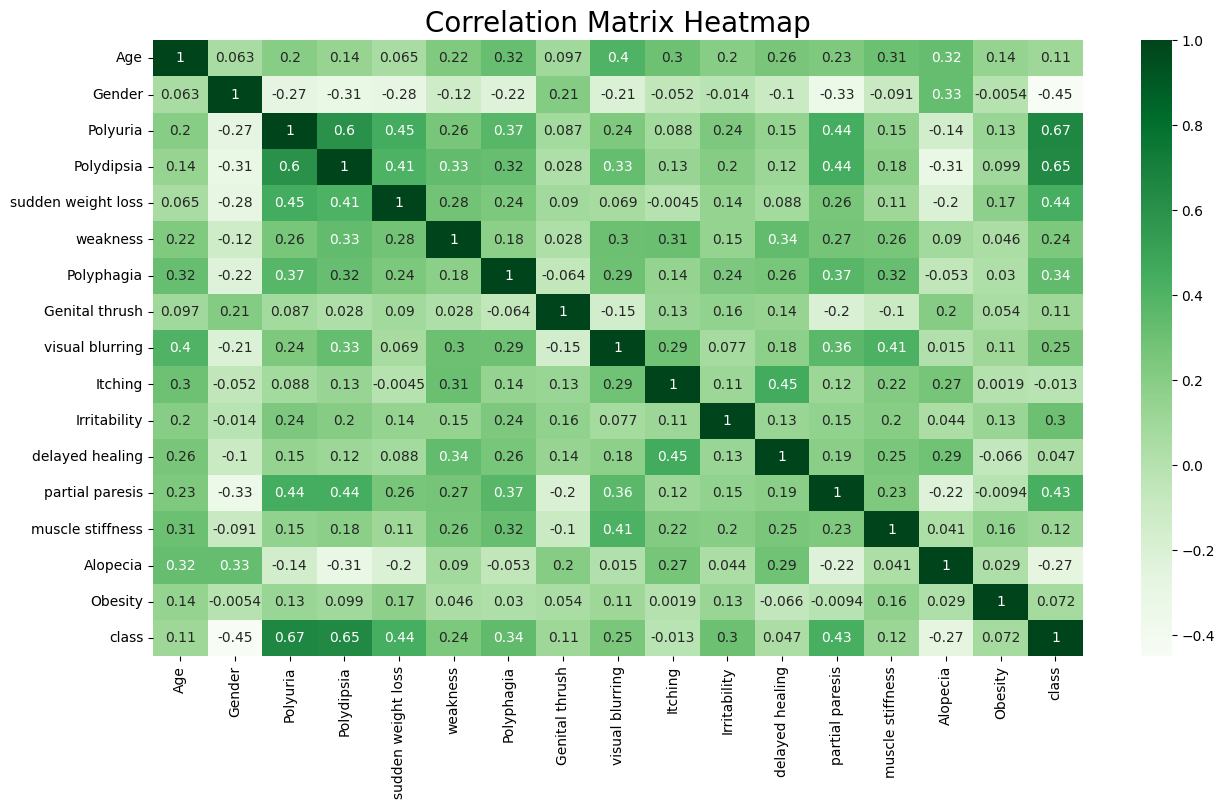

In [17]:
# CORRELATION MATRIX HEATMAP
fig, axs = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

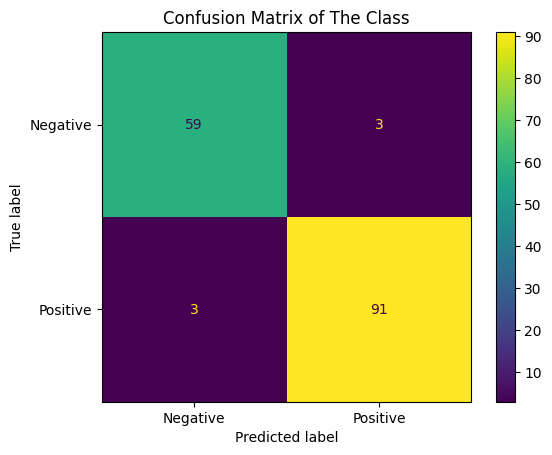

In [18]:
# CONFUSION MATRIX
labels=['Negative', 'Positive']
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.title('Confusion Matrix of The Class')
plt.show()

# Dashboard

In [19]:
# read images from the 'Data' folder
img0 = open('../data/histogram_age.png', 'rb').read()
img1 = open('../data/counts_by_features.png', 'rb').read()
img2 = open('../data/correlation_matrix.png', 'rb').read()
img3 = open('../data/confusion_matrix.png', 'rb').read()

# create image widgets
img0_widget = widgets.Image(value=img0, format='png', width=800, height=500)
img1_widget = widgets.Image(value=img1, format='png', width=800, height=500)
img2_widget = widgets.Image(value=img2, format='png', width=800, height=500)
img3_widget = widgets.Image(value=img3, format='png', width=500, height=250)

# create HTML widgets for text
text0_wdiget = widgets.HTML(value='<ul><li>The mean of the age dataset was 48.0 years old.</li>\
                            <li>The median of the age dataset was 47.5 years old.</li>\
                            <li>Since the mean and the median were almost the same, the age dataset was symmetric.</li></ul>')
text1_wdiget = widgets.HTML(value='<ul><li>Age, male, itching, delayed healing, and alopecia(hair loss) were less likely to be a sign of diabetes.</li>\
                            <li>Female, polyuria(excessive urination amount), polydipsia(excessive thirst), and irritability(mood swing) were more likely \
                            to be a sign of diabetes.</li></ul>')
text2_widget = widgets.HTML(value='<ul><li>Polyuria(excessive urination amount) and polydipsia(excessive thirst) were moderately correlated.</li>\
                            <li>None of the features were highly correlated except itself.</li></ul>')
text3_widget = widgets.HTML(value='<ul><li><b>Precision:</b> True Positive / (True Positive + False Positive) = 91 / (91 + 3) = <b>0.968</b></li>\
                            <li><b>Recall:</b> True Positive / (True Positive + False Negative) = 91 / (91 + 3) = <b>0.968</b></li>\
                            <li><b>Accuracy:</b> Correct Prediction / All Predictions = (59 + 91) / (59 + 3 + 3 + 91) = <b>0.962</b></li></ul>')

title_widget = widgets.HTML(value='<h1>Dashboard</h1>')
line_break_widget = widgets.HTML(value='<hr>')

hbox0 = widgets.HBox([img0_widget, text0_wdiget])
hbox1 = widgets.HBox([img1_widget, text1_wdiget])
hbox2 = widgets.HBox([img2_widget, text2_widget])
hbox3 = widgets.HBox([img3_widget, text3_widget])
vbox = widgets.VBox([title_widget, line_break_widget, hbox0, line_break_widget, hbox1, line_break_widget, hbox2, line_break_widget, hbox3])
display(vbox)

# GUI

In [20]:
# get the minimum and maximum age from dataframe for normalization on the 'Age'
min_age = df["Age"].min()
max_age = df["Age"].max()

In [21]:
# create title
gui_title_widget = widgets.HTML(value='<h1>Early Stage Diabetes Risk Prediction</h1>')

# text boxes for the user's input
age_widget = widgets.FloatText(description='Age: ', value=0)

# radio buttons for the user's selections
gender_widget = widgets.RadioButtons(
    options=['Male', 'Female'],
    description='Gender: ',
    disabled=False
)
polyuria_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Excessive Urination Amount: ',
    disabled=False
)
polydipsia_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Excessive Thirst: ',
    disabled=False
)
swl_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Sudden Weight Loss: ',
    disabled=False
)
weakness_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Weakness: ',
    disabled=False
)
polyphagia_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Excessive Hunger: ',
    disabled=False
)
gt_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Genital Thrush (yeast infection): ',
    disabled=False
)
vb_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Visual Blurring: ',
    disabled=False
)
itching_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Itching: ',
    disabled=False
)
irritability_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Irritability (mood swing): ',
    disabled=False
)
dh_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Delayed Healing: ',
    disabled=False
)
pp_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Partial Paresis (muscle weakness): ',
    disabled=False
)
ms_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Muscle Stiffness: ',
    disabled=False
)
alopecia_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Alopecia (hair loss): ',
    disabled=False
)
obesity_widget = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Obesity: ',
    disabled=False
)

# the submittion button to get predictions
button_submit = widgets.Button(description='Submit')
button_output = widgets.HTML(value='<b>Choose selections and press the \"Submit\" button.</b>')

# create disclaimer
disclaimer_widget = widgets.HTML(value='<h3>*** The prediction is not intended to be a substitute for professional medical advice. \
                                 Always seek the advice of your doctor. ***</h3>')

# on_click function: prediction
def on_click_predict(b):
    # normalize age value
    age_normalized = (int(age_widget.value) - min_age) / (max_age - min_age)
    
    yn_features = [age_normalized, gender_widget.value, polyuria_widget.value, polydipsia_widget.value, 
        swl_widget.value, weakness_widget.value, polyphagia_widget.value, gt_widget.value, vb_widget.value, itching_widget.value, 
        irritability_widget.value, dh_widget.value, pp_widget.value, ms_widget.value, alopecia_widget.value, obesity_widget.value]
    
    # convert 'Yes' and 'No' into one and zero respectively
    for i in range(16):
        if yn_features[i] == 'Yes':
            yn_features[i] = 1
        elif yn_features[i] == 'No':
            yn_features[i] = 0
        elif yn_features[i] == 'Male':
            yn_features[i] = 1
        elif yn_features[i] == 'Female':
            yn_features[i] = 0

    input = np.array([yn_features])

    prediction = model.predict(input)
    if prediction[0] == 1:
        button_output.value = '<b>Prediction: Positive</b>'
    elif prediction[0] == 0:
        button_output.value = '<b>Prediction: Negative</b>'

button_submit.on_click(on_click_predict)

# display all widgets in a VBox
vbox = widgets.VBox([gui_title_widget, age_widget, gender_widget, polyuria_widget, polydipsia_widget, swl_widget, weakness_widget, polyphagia_widget, 
                     gt_widget, vb_widget, itching_widget, irritability_widget, dh_widget, pp_widget, ms_widget, alopecia_widget, 
                     obesity_widget, button_submit, button_output, disclaimer_widget])

display(vbox)

# Serializing The Model

In [22]:
# import package
import pickle

data = {"model": model, "dataframe": df, "y_test": y_test, "y_pred": y_pred}
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [23]:
with open('svc_model.pkl', 'rb') as file:
    data = pickle.load(file)

svc_loaded = data['model']
df_loaded = data['dataframe']
y_test_loaded = data['y_test']
y_pred_loaded = data['y_pred']

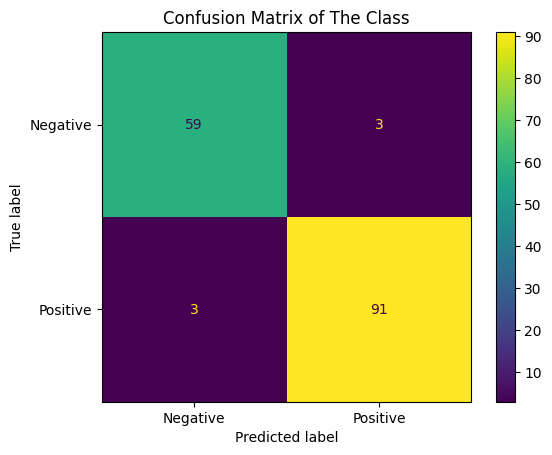

In [25]:
# CONFUSION MATRIX
labels=['Negative', 'Positive']
# cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test_loaded.values, y_pred_loaded)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.title('Confusion Matrix of The Class')
plt.show()